In [1]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# from google.colab import drive
# drive.mount('/content/drive')

# attempts = ["/content/drive/My Drive/Table 4/Data/foil_trial_1.txt", "/content/drive/My Drive/Table 4/Data/foil_trial_2.txt"]

attempts = ["Data/foil_trial_1.txt", "Data/foil_trial_2.txt", "Data/foil_trial_3.txt",                          # foil (3)
            "Data/cardboard_trial_1.txt", "Data/cardboard_trial_2.txt", "Data/cardboard_trial_3.txt",           # cardboard (3)
            "Data/styrofoam_trial_1.txt", "Data/styrofoam_trial_2.txt", "Data/styrofoam_trial_3.txt",           # styrofoam (3)
            "Data/bubblewrap_trial_1.txt", "Data/bubblewrap_trial_2.txt", "Data/bubblewrap_trial_3.txt"]        # bubblewrap (3)

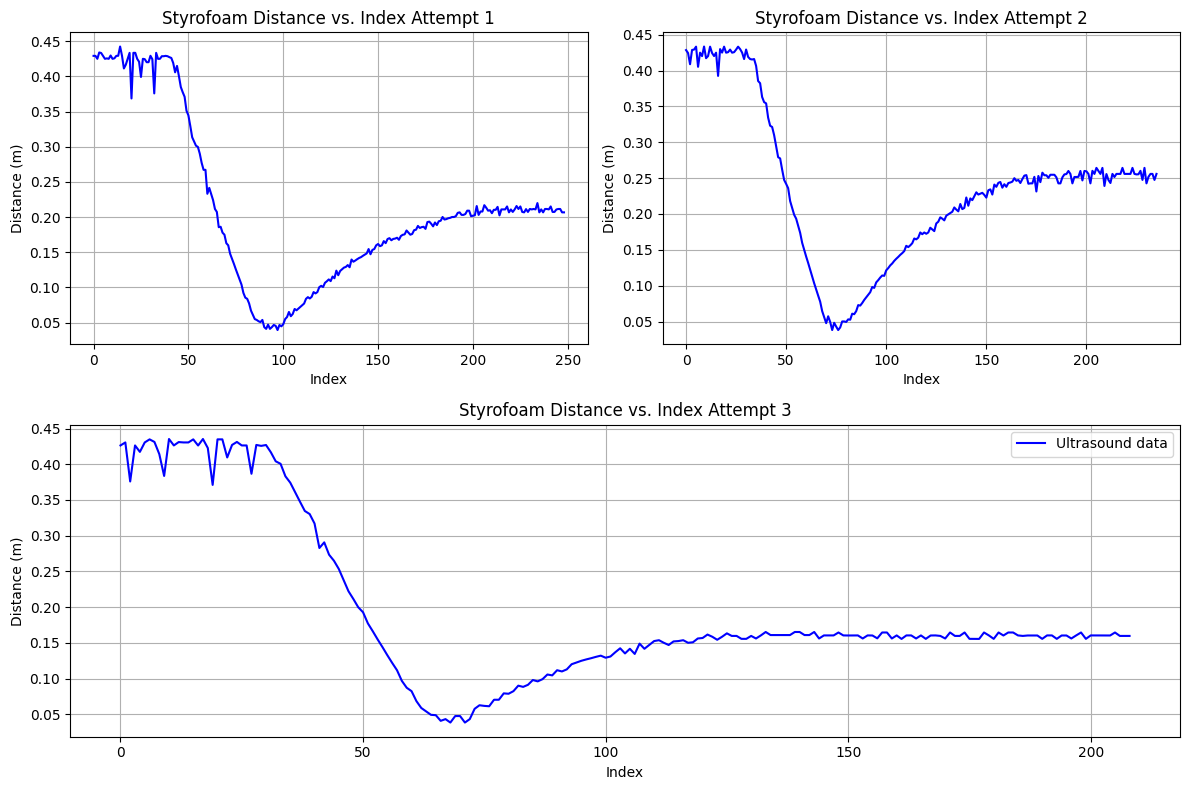

In [2]:
#### styrofoam ATTEMPTS
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one', 'two'],['three', 'three']], figsize=(12, 8))

for plot_index in plots:
    read_in_array = np.loadtxt(attempts[plots.index(plot_index) + 6], delimiter=',')

    # Extract time, position, x-axis accelerometer output
    time_millis = read_in_array[:,0]
    dist_cm = read_in_array[:,1]
    # accel_x_output = read_in_array[:,2]

    # Time from ms to s, distance from cm to m
    time_s = time_millis/1000
    time_s = time_s - time_s[0]
    dist_m = dist_cm/100

    # Replace arange statement with 'time_s - time_s[0]' for dist. v time
    axes[plot_index].plot(np.arange(len(time_s)), dist_m, label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Styrofoam Distance vs. Index Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Index")
    axes[plot_index].set_ylabel("Distance (m)")

    axes[plot_index].grid()

plt.legend()
plt.tight_layout()
plt.show()

In [3]:
## ----- Calibrating the accelerometer ------ ##

# Load in the data
read_in_array_x = np.loadtxt('Data/project_x_calibration.txt', delimiter = ',')
read_in_array_y = np.loadtxt('Data/project_y_calibration.txt', delimiter = ',')
read_in_array_z = np.loadtxt('Data/project_z_calibration.txt', delimiter = ',')

# Extract the time, distance, and accelerometer outputs in the x, y, and z directions
x_calibration_time = read_in_array_x[:,0] / 1000
x_calibration_dist = read_in_array_x[:,1] / 100
x_calibration_ax = read_in_array_x[:,2]
x_calibration_ay = read_in_array_x[:,3]
x_calibration_az = read_in_array_x[:,4]

y_calibration_time = read_in_array_y[:,0] / 1000
y_calibration_dist = read_in_array_y[:,1] / 100
y_calibration_ax = read_in_array_y[:,2]
y_calibration_ay = read_in_array_y[:,3]
y_calibration_az = read_in_array_y[:,4]

z_calibration_time = read_in_array_z[:,0] / 1000
z_calibration_dist = read_in_array_z[:,1] / 100
z_calibration_ax = read_in_array_z[:,2]
z_calibration_ay = read_in_array_z[:,3]
z_calibration_az = read_in_array_z[:,4]

# True accelerations along x, y, z directions
x_calibration_true_ax = np.ones(len(read_in_array_x)) * -9.81
x_calibration_true_ay = np.zeros(len(read_in_array_x))
x_calibration_true_az = np.zeros(len(read_in_array_x))

y_calibration_true_ax = np.zeros(len(read_in_array_y))
y_calibration_true_ay = np.ones(len(read_in_array_y)) * -9.81
y_calibration_true_az = np.zeros(len(read_in_array_y))

z_calibration_true_ax = np.zeros(len(read_in_array_z))
z_calibration_true_ay = np.zeros(len(read_in_array_z))
z_calibration_true_az = np.ones(len(read_in_array_z)) * -9.81

# Calibrate
output_ax = np.append(x_calibration_ax, np.append(y_calibration_ax, z_calibration_ax))
true_ax = np.append(x_calibration_true_ax, np.append(y_calibration_true_ax, z_calibration_true_ax))

coeff_x, cov_x = np.polyfit(output_ax, true_ax, 1, cov=True)

## Function to convert normal x-axis accelerometer data to calibrated data ##
def output_to_accel_x(coeff_x, output):
    accel =  coeff_x[0] * output + coeff_x[1]
    return accel
# Calculate relative acceleration

# rel_accel = output_to_accel_x(coeff_x, accel_x_output) + 9.8

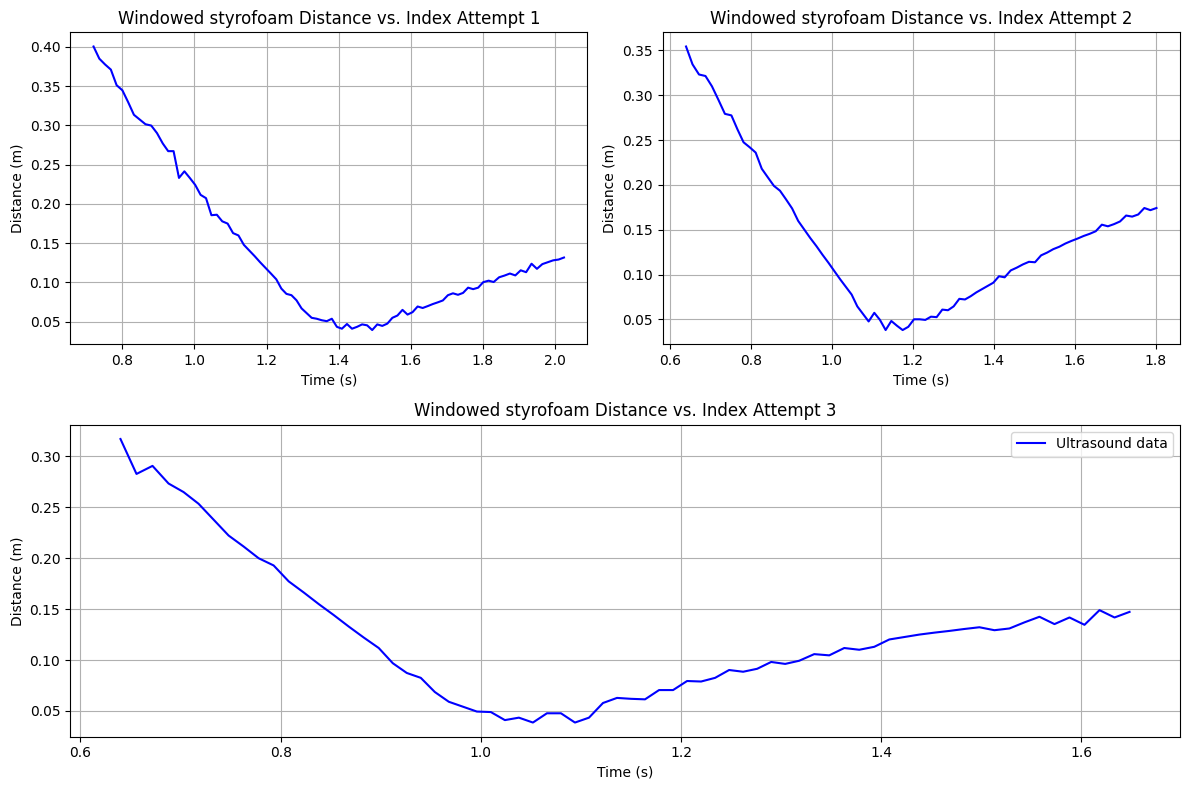

In [32]:
start_index_styrofoam = [45, 40, 40]
stop_index_styrofoam = [135, 120, 110]
time_windows_styrofoam = []
dist_windows_styrofoam = []
accel_windows_styrofoam = []

## styrofoam -- Windowed distance ##
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one', 'two'],['three', 'three']], figsize=(12, 8))
for plot_index in plots:
    read_in_array = np.loadtxt(attempts[plots.index(plot_index) + 6], delimiter=',')

    # Extract time, position, x-axis accelerometer output
    time_millis = read_in_array[:,0]
    dist_cm = read_in_array[:,1]
    accel_x_output = read_in_array[:,2]
    accel_x_output = output_to_accel_x(coeff_x, accel_x_output)
    accel_x_output = accel_x_output[start_index_styrofoam[plots.index(plot_index)]:stop_index_styrofoam[plots.index(plot_index)]]
    accel_windows_styrofoam.append(accel_x_output)

    # Time from ms to s, distance from cm to m
    time_s = time_millis/1000
    time_s = time_s - time_s[0]
    dist_m = dist_cm/100

    time_window = time_s[start_index_styrofoam[plots.index(plot_index)]:stop_index_styrofoam[plots.index(plot_index)]]
    dist_window = dist_m[start_index_styrofoam[plots.index(plot_index)]:stop_index_styrofoam[plots.index(plot_index)]]
    time_windows_styrofoam.append(time_window)
    dist_windows_styrofoam.append(dist_window)

    # Replace arange statement with 'time_s - time_s[0]' for dist. v time
    axes[plot_index].plot(time_window, dist_window, label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Windowed styrofoam Distance vs. Index Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Time (s)")
    axes[plot_index].set_ylabel("Distance (m)")

    axes[plot_index].grid()

plt.legend()
plt.tight_layout()
plt.show()

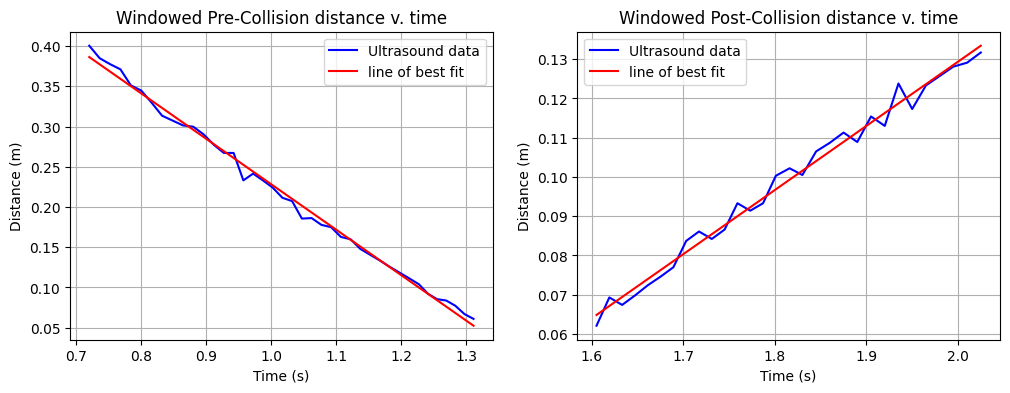

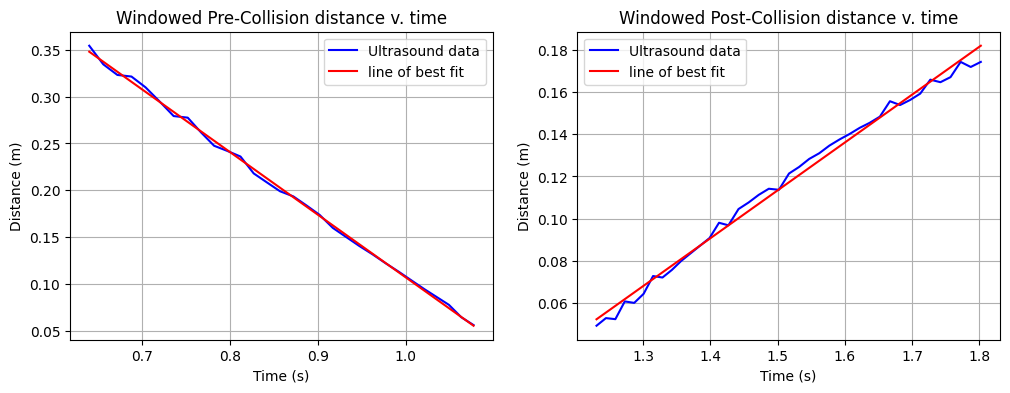

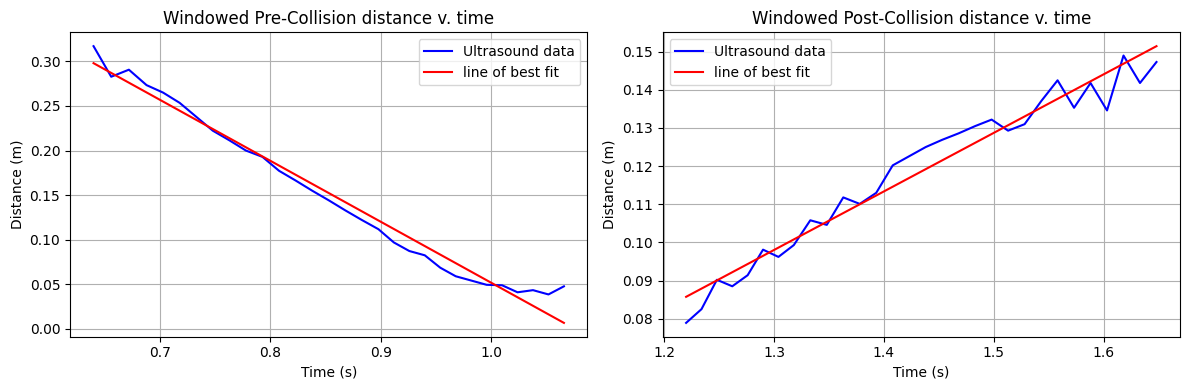

In [33]:
collision_index_start_styrofoam = [85, 70, 70]
collision_index_stop_styrofoam = [105, 80, 80]

time_window_pre_collision = []
dist_window_pre_collision = []

time_window_post_collision = []
dist_window_post_collision = []

coeff_linear_pre_collision = []
coeff_linear_post_collision = []

y_fit_pre_collision = []
y_fit_post_collision = []

# for loop for collision indices
for i in range(3):
    time_window_pre_collision.append(time_windows_styrofoam[i][:collision_index_start_styrofoam[i] - start_index_styrofoam[i]])
    time_window_post_collision.append(time_windows_styrofoam[i][collision_index_stop_styrofoam[i] - start_index_styrofoam[i]:])

    dist_window_pre_collision.append(dist_windows_styrofoam[i][:collision_index_start_styrofoam[i] - start_index_styrofoam[i]])
    dist_window_post_collision.append(dist_windows_styrofoam[i][collision_index_stop_styrofoam[i] - start_index_styrofoam[i]:])

# for loop for best-fit lines
for i in range(3):
    coeff_linear_pre = np.polyfit(time_window_pre_collision[i], dist_window_pre_collision[i], 1)
    y_fit_pre = coeff_linear_pre[0]*time_window_pre_collision[i] + coeff_linear_pre[1]
    coeff_linear_pre_collision.append(coeff_linear_pre)
    y_fit_pre_collision.append(y_fit_pre)

    coeff_linear_post = np.polyfit(time_window_post_collision[i], dist_window_post_collision[i], 1)
    y_fit_post = coeff_linear_post[0]*time_window_post_collision[i] + coeff_linear_post[1]
    coeff_linear_post_collision.append(coeff_linear_post)
    y_fit_post_collision.append(y_fit_post)

    plots = ['one', 'two']
    fig, axes = plt.subplot_mosaic([['one', 'two']], figsize=(12, 4))
    axes[plots[0]].plot(time_window_pre_collision[i], dist_window_pre_collision[i], label="Ultrasound data", color="b")
    axes[plots[0]].plot(time_window_pre_collision[i], y_fit_pre, color="r", label="line of best fit")
    axes[plots[0]].set_title("Windowed Pre-Collision distance v. time")
    axes[plots[0]].set_xlabel("Time (s)")
    axes[plots[0]].set_ylabel("Distance (m)")
    axes[plots[0]].grid()
    axes[plots[0]].legend()

    axes[plots[1]].plot(time_window_post_collision[i], dist_window_post_collision[i], label="Ultrasound data", color="b")
    axes[plots[1]].plot(time_window_post_collision[i], y_fit_post, color="r", label="line of best fit")
    axes[plots[1]].set_title("Windowed Post-Collision distance v. time")
    axes[plots[1]].set_xlabel("Time (s)")
    axes[plots[1]].set_ylabel("Distance (m)")
    axes[plots[1]].grid()
    axes[plots[1]].legend()

plt.tight_layout()
plt.show()


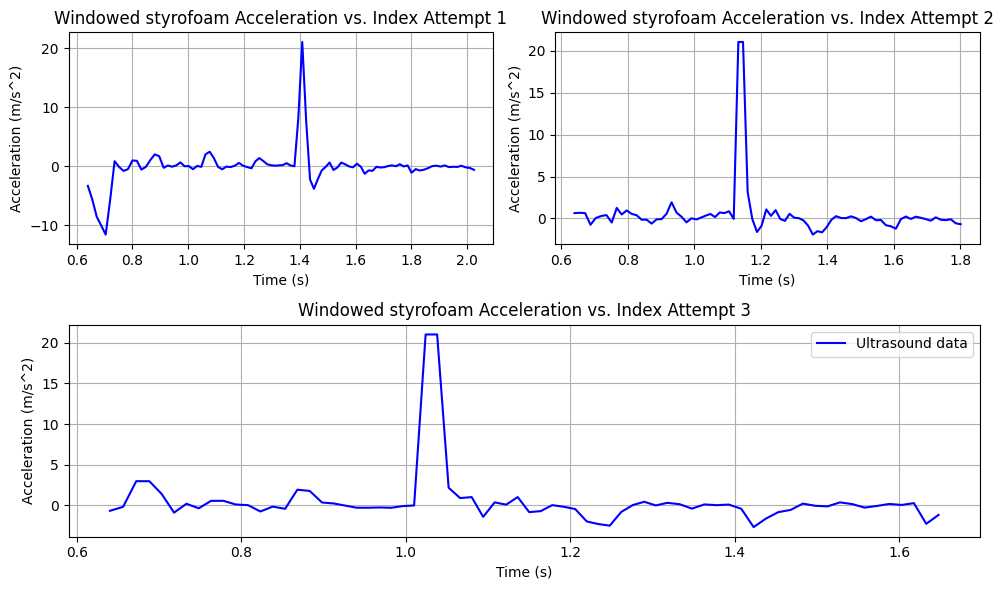

In [30]:
## styrofoam -- ACCELERATION ##
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one', 'two'],['three', 'three']], figsize=(10, 6))
for plot_index in plots:
    index = plots.index(plot_index)
    axes[plot_index].plot(time_windows_styrofoam[index], accel_windows_styrofoam[index], label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Windowed styrofoam Acceleration vs. Index Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Time (s)")
    axes[plot_index].set_ylabel("Acceleration (m/s^2)")
    axes[plot_index].grid()

plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# styrofoam - momentum loss
def momentum(mass, velocity):
  return mass * velocity

m = 489 / 1000 # kg

p_pre_collision = []
p_post_collision = []
momentum_loss = []
impulse = []

for i in range(3):
  p_pre_collision.append(momentum(m, coeff_linear_pre_collision[i][0]))
  p_post_collision.append(momentum(m, coeff_linear_post_collision[i][0]))
  momentum_loss.append((abs(p_post_collision[i]) - abs(p_pre_collision[i])) * (100 / abs(p_pre_collision[i])))
  impulse.append(p_post_collision[i] - p_pre_collision[i])

  print("trial {0}:\n\tinital velocity: {1} m/s\n\tfinal velocity: {2} m/s\n\tmomentum loss: {3} %\n\timpulse: {4} N*s".format(i + 1, coeff_linear_pre_collision[i][0], coeff_linear_post_collision[i][0], momentum_loss[i], impulse[i]))

trial 1:
	inital velocity: -0.5652033918590026 m/s
	final velocity: 0.16329357958128315 m/s
	momentum loss: -71.10888187627528 %
	impulse: 0.3562350190342997 N*s
trial 2:
	inital velocity: -0.6693600444517356 m/s
	final velocity: 0.22663812018489068 m/s
	momentum loss: -66.14107428976776 %
	impulse: 0.4381431025073102 N*s
trial 3:
	inital velocity: -0.6838895012852927 m/s
	final velocity: 0.15354651757136087 m/s
	momentum loss: -77.54805165413599 %
	impulse: 0.4095062132209036 N*s


In [14]:
# energy loss
def energy(mass, velocity):
  return 0.5 * mass * (velocity**2)

m = 489 / 1000 # kg

E_pre_collision = []
E_post_collision = []
energy_loss = []

for i in range(3):
  E_pre_collision.append(energy(m, coeff_linear_pre_collision[i][0]))
  E_post_collision.append(energy(m, coeff_linear_post_collision[i][0]))
  energy_loss.append((abs(E_post_collision[i]) - abs(E_pre_collision[i])) * (100 / abs(E_pre_collision[i])))

  print("trial {0}:\n\tinital velocity: {1} m/s\n\tfinal velocity: {2} m/s\n\tmomentum loss: {3} %".format(i + 1, coeff_linear_pre_collision[i][0], coeff_linear_post_collision[i][0], momentum_loss[i]))

trial 1:
	inital velocity: -0.4861610870642053 m/s
	final velocity: 0.15985964154083993 m/s
	momentum loss: -67.11796855108481 %
trial 2:
	inital velocity: -0.6693600444517348 m/s
	final velocity: 0.2435885813075814 m/s
	momentum loss: -63.608735937158905 %
trial 3:
	inital velocity: -0.683889501285293 m/s
	final velocity: 0.1535465175713609 m/s
	momentum loss: -77.548051654136 %
